In [1]:
import os 
import numpy as np 
import scipy.stats as ss
import nibabel as nib 
import hcp_utils as hcp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so 
from surfplot import Plot

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
dir_path = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data'
rgba_mv = np.load(os.path.join(dir_path, 'rgba_mv_rmRS_167.npy'))
import v_model_hsv as vmod 
th_ind_mv, rd_ind_mv, th_grp_mv, rd_grp_mv, color_mv = vmod.v_hsv_model_rgba_indiv(rgba_mv)

In [3]:
parc = hcp.mmp.map_all[hcp.struct.cortex]
brod = pd.read_csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/brodmann_32k.csv').iloc[:,1]

In [4]:
brod_use = [] 
brod_use.append(86)
brod_use.append(87)
brod_use.append(70)
brod_use.append(78)
brod_use.append(79)
brod_use.append(76)
brod_use.append([58,59,62])
brod_use.append(60)
brod_use.append(61)
brod_use.append(64)
len(brod_use)

10

In [5]:
parc_use=[]
parc_use.append([24,204,174,354,124,304])
parc_use.append([175,355,125,305])
parc_use.append([128,308,129,309])
parc_use.append([130,310,176,356])
len(parc_use)

4

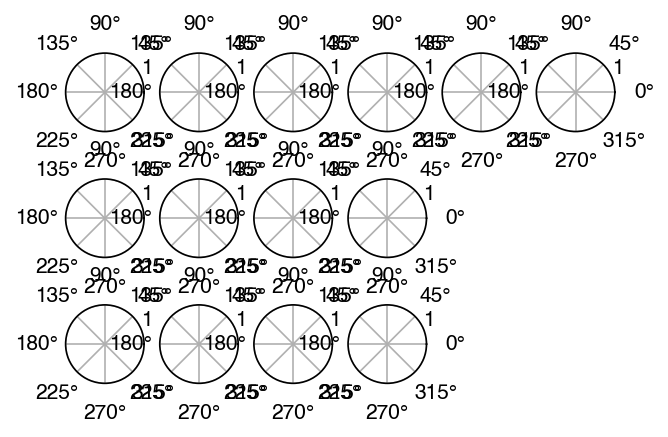

In [39]:
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Helvetica"

cm = 1/2.54
fig=plt.figure(figsize=(12*cm, 8*cm), dpi=150)
gs = GridSpec(3, 6, figure=fig)
axs = [None]*14
for i in range(6):
    axs[i] = fig.add_subplot(gs[0,i], projection="polar")
for j in range(4):
    axs[j+6] = fig.add_subplot(gs[1,j], projection="polar")
for k in range(4):
    axs[k+10] = fig.add_subplot(gs[2,k], projection="polar")

In [40]:
titles = ['BA17', 'BA18', 'BA19', 'BA37', 'BA20', 'BA21', 'BA1/2/3', 'BA5', 'BA7', 'BA40']

for m in range(10):
    msk = np.zeros(59412)
    brod_lab = brod_use[m]
    if type(brod_lab)==int:
        msk[brod==brod_lab] = 1
    else:
        for i in range(len(brod_lab)):
            msk[brod==brod_lab[i]] = 1
    axs[m].scatter(th_grp_mv[msk==1], rd_grp_mv[msk==1], c=color_mv[msk==1,:], alpha=.1, s=10)
    axs[m].set_ylim([0,1])
    axs[m].set_yticks([0.5, 1])
    axs[m].set_xticks([0/360*2*np.pi,120/360*2*np.pi,240/360*2*np.pi])
    if m==0:
        axs[m].set_xticklabels(labels=['','',''], fontdict={'fontsize':6, "color":'grey'})
        axs[m].set_yticklabels(labels=['0.5', '1.0'], fontdict={'fontsize':6, "color":'grey'})
    else:
        axs[m].set_xticklabels(labels=['','',''])
        axs[m].set_yticklabels(labels=['',''])
    
    axs[m].set_rlabel_position(-65.5)
    axs[m].tick_params(axis='x', which='major', pad=-4)
    axs[m].grid(linewidth=0.5, color='grey', alpha=1)
    axs[m].spines['polar'].set_visible(False)
    axs[m].set_title(titles[m], fontdict={'fontsize':7}, y=-.35)


In [41]:
titles = ['A1/A2/A3', 'A4/A5', 'STSd', 'STSv']

for n in range(4):
    msk = np.zeros(59412)
    parc_lab = parc_use[n]

    for j in range(len(parc_lab)):
        msk[parc==parc_lab[j]]=1

    axs[n+10].scatter(th_grp_mv[msk==1], rd_grp_mv[msk==1], c=color_mv[msk==1,:], alpha=.1, s=10)
    axs[n+10].set_ylim([0,1])
    axs[n+10].set_yticks([0.5, 1])
    axs[n+10].set_xticks([0/360*2*np.pi,120/360*2*np.pi,240/360*2*np.pi])
    axs[n+10].set_xticklabels(labels=['','',''])
    axs[n+10].set_yticklabels(labels=['','']) 
    axs[n+10].set_rlabel_position(-55.5)
    axs[n+10].tick_params(axis='x', which='major', pad=-4)
    axs[n+10].grid(linewidth=0.5, color='grey', alpha=1)
    axs[n+10].spines['polar'].set_visible(False)
    axs[n+10].set_title(titles[n], fontdict={'fontsize':7}, y=-.35)

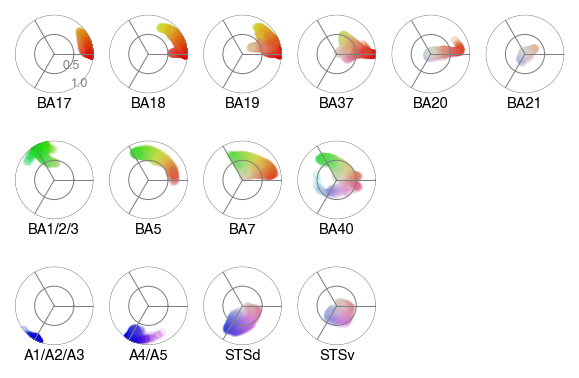

<Figure size 432x288 with 0 Axes>

In [42]:
plt.tight_layout()
fig

In [43]:
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f05/circs_final.pdf', transparent=True)